# Digit Recognitizer

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike. Here our goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.

In [1]:
# All required libraries are imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
# Label is droped from training data
df = pd.read_csv('train.csv', header=0)
df_label = df['label']
df = df.drop('label', axis=1)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


25167


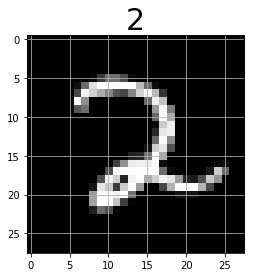

In [3]:
# The data is ampped to image to check whether the data and label is in sync with each other
r = np.random.randint(len(df.index))
print(r)
imgshow = plt.imshow(df.iloc[r].values.reshape(28,28), cmap='gray')
plt.title(df_label[r], fontsize=30)
plt.grid()
plt.show()

In [4]:
# K Nearest Neighbour Agorithm is implemented
knn = KNeighborsClassifier()

In [5]:
# Data is splitted randomly into training and validation data
df_train, df_test, label_train, label_test = train_test_split(df, df_label, test_size=0.33, random_state=42)

In [6]:
# The classifier is treined with the training data
knn.fit(df_train.values, label_train.values)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [7]:
# The trained classifier is used to predict values from validation data
prediction = knn.predict(df_test.values)

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
# Accuracy score of prediction on validation data
accuracy_score(prediction,label_test.values)

0.96450216450216453

In [10]:
# Test dataset is imported
df_test2 = pd.read_csv('test.csv', header=0)
df_test2.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Test data is predicted
prediction2 = knn.predict(df_test2.values)

In [12]:
df_output = pd.DataFrame({
    'ImageId' : df_test2.index.values+1,
    'label': prediction2
})

In [14]:
# the predicted value is stored in a csv file
df_output.to_csv("./output/output.csv", sep=',', index=False)